In [1]:
import json
import numpy as np
from tqdm import tqdm
from dataclasses import asdict
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import shapely
import shapely.wkt
from shapely.geometry import Polygon, MultiPolygon

# sys.path.append("../synth_utils/")
# os.chdir("..")
sys.path.append("/home/mkutuga/Pipeline_v2/Pipeline/SemiF-AnnotationPipeline")
sys.path.append("/home/mkutuga/Pipeline_v2/Pipeline/SemiF-SyntheticPipeline")
# os.chdir("/home/weedsci/matt/SemiF-SyntheticPipeline/")
from semif_utils.datasets import Cutout

from synth_utils.utils import trans_cutout
import random
from synth_utils.viz import display_images
from synth_utils.config_utils import cutoutmeta2csv, get_cutout_meta
from synth_utils.viz import plot_cutouts
from datetime import date
today = date.today().strftime("%Y-%m-%d")
!pwd

/home/mkutuga/Pipeline_v2/Pipeline/SemiF-SyntheticPipeline/notebooks


#### Cutout2metacsv

In [2]:
# path = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts/MD_2022-07-05/MD_Row-10_1657032952_6.json"
cutoutdir = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts"
# batch_id = "MD_2022-07-06_v1_unfinished"
savedir = "/home/weedsci/matt/SemiF-AnnotationPipeline/Assets"
batchdir = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts"
# batchdir = "/media/hdd1/mkutu/wir/semifield-cutouts"

# Get batches without csvs already made
batch_ids = sorted(
    [x.name for x in Path(batchdir).glob("*") if ("." not in x.name) & (not Path(x, x.name + ".csv").is_file())])[:1]
# metajsons = sorted(Path(batchdir).rglob("*.json"))
batch_ids

['NC_2022-08-22']

## Create Cutout CSVs

In [3]:
dfs = []
for batch_id in batch_ids:
    csv_path = f"{batchdir}/{batch_id}/{batch_id}.csv"
    save_path = f"{savedir}/{batch_id}_histogram.png"
    
    df = cutoutmeta2csv(cutoutdir, batch_id, csv_path, save_df=True)
    

100%|██████████| 2834/2834 [00:03<00:00, 875.97it/s]


### Dataframe for all Cutouts so far

In [4]:
# Get all cutouts
batchdir = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts"
cutout_dfs = [pd.read_csv(x) for x in Path(batchdir).rglob("*.csv")]
allcuts = pd.concat(cutout_dfs).reset_index(drop=True)
allcuts = allcuts[allcuts["common_name"]!="unknown"]
allcuts.batch_id.unique()


array(['MD_2022-08-24', 'NC_2022-08-19', 'NC_2022-09-23', 'MD_2022-07-20',
       'MD_2022-08-31', 'MD_2022-07-06', 'MD_2022-08-26', 'NC_2022-09-15',
       'MD_2022-07-22', 'MD_2022-08-08', 'NC_2022-09-01', 'NC_2022-08-22',
       'NC_2022-08-05', 'NC_2022-08-09', 'MD_2022-08-03', 'NC_2022-09-19',
       'NC_2022-09-02', 'NC_2022-08-18', 'MD_2022-07-05', 'NC_2022-08-10',
       'MD_2022-09-16', 'NC_2022-08-15', 'MD_2022-07-15', 'NC_2022-08-24',
       'MD_2022-08-15', 'MD_2022-08-05', 'NC_2022-08-17', 'MD_2022-08-04'],
      dtype=object)

In [2]:
allcuts = pd.read_csv("../../test_cutouts.csv", low_memory=False)

/tmp/ipykernel_1072474/1915456873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temp_path"] = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts/" + df["cutout_path"].str.replace("png","jpg")


340
339
338
337
336


KeyboardInterrupt: 

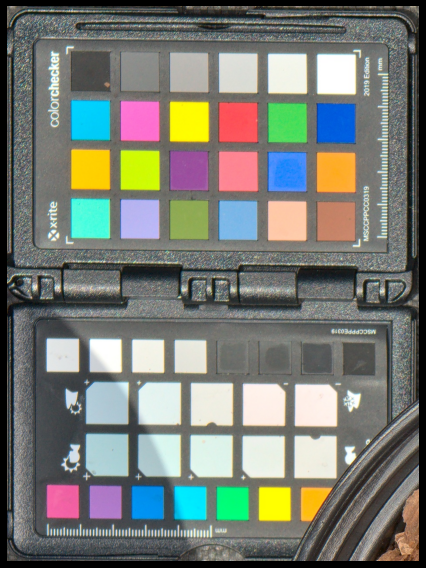

In [8]:

df = allcuts[allcuts["common_name"]=="colorchecker"]
df.to_csv("test.csv")
df["temp_path"] = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts/" + df["cutout_path"].str.replace("png","jpg")
paths = list(df["temp_path"].copy())
kimgs = 1
ncol= 1
nrow= 1
for i in range(0,len(paths)):
    imgps = random.choices(paths, k=kimgs)
    print(len(paths))
    [paths.remove(x) for x in imgps]
    imgs = [trans_cutout(img) for img in imgps]
    display_images(imgs, nrow=nrow, ncol=ncol, show=False, save=False, save_path=f"./assets/colorchecker/colorchecker_{random.randint(0,100000)}.png", figsize=(12,8))

In [9]:
allcuts["temp_path"] = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts" + allcuts["cutout_path"]
allcuts["temp_path"].shape

(115686,)

### View Cutouts

## Plot Cutouts per batch and all together

### By batch

In [4]:
from tqdm import tqdm
for batch in tqdm(allcuts.batch_id.unique()):
    bdf = allcuts[allcuts["batch_id"] == batch]
    plot_cutouts(subplot=1,
                 df=bdf,
                 y='common_name',
                 title=batch,
                 figsize=(12, 8),
                 color="RdYlGn",
                 xlabel="Number of cutouts",
                 ylabel='',
                 rotation=0,
                 tick_bottom=True,
                 tick_left=True,
                 text_wrapping=13,
                 save_path=f"{savedir}/{batch}_histogram.png",
                 save=True,
                 show=False)


NameError: name 'allcuts' is not defined

### All cutouts

In [68]:
df = allcuts.copy()
df.columns

df["collection_location"]= df["batch_id"].str.split("_", expand=True).iloc[:,0]
# df["batch_id"].str.split("_").str(0)


0         Giant foxtail
1         Giant foxtail
2         Giant foxtail
3         Giant foxtail
4         Giant foxtail
              ...      
229727        Cocklebur
229728        Cocklebur
229729        Cocklebur
229730        Cocklebur
229731        Cocklebur
Name: common_name, Length: 229732, dtype: object

/home/mkutuga/anaconda3/envs/semif_gpu/lib/python3.9/site-packages/seaborn/categorical.py:3202: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


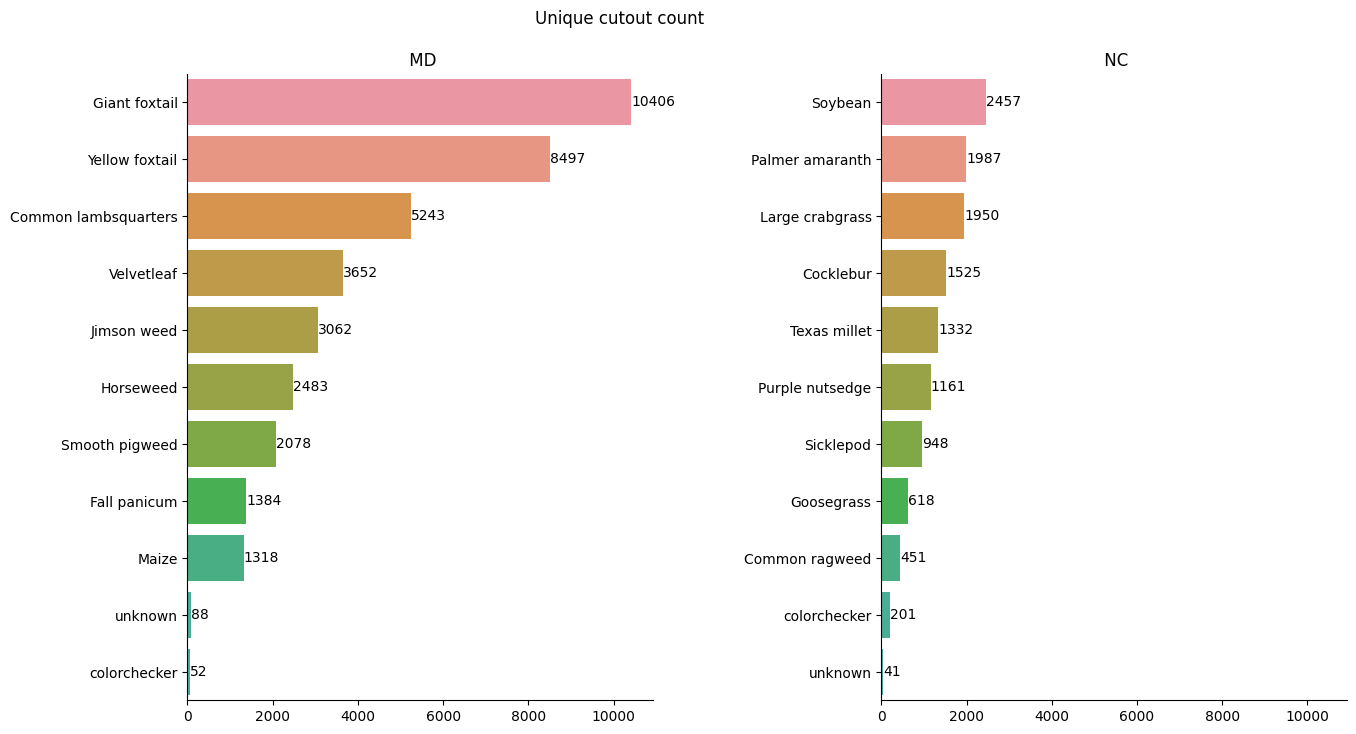

In [113]:
# use count() and sort()
df = allcuts.copy()
df = df[df["is_primary"] ==True]
df["collection_location"]= df["batch_id"].str.split("_", expand=True).iloc[:,0]
dfgb = df.groupby(['common_name', 'collection_location'])['cutout_id'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
g=sns.catplot(data=dfgb,y="common_name", x="Count", kind="bar", col="collection_location", sharey=False, margin_titles=True)
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Unique cutout count')
g.set_titles("{row_name}")

# iterate through axes
for ax in g.axes.ravel():
    title = ax.get_title().split("=")[1]
    ax.set_title(title)
    # add annotations
    for c in ax.containers:
        labels = [f'{int(v.get_width())}' for v in c]
        ax.bar_label(c, labels=labels, label_type="edge",)
g.set_axis_labels("", "")
plt.show()

/tmp/ipykernel_2774393/1910796020.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, 1)
/tmp/ipykernel_2774393/1910796020.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  yplot = sns.histplot(y="common_name",


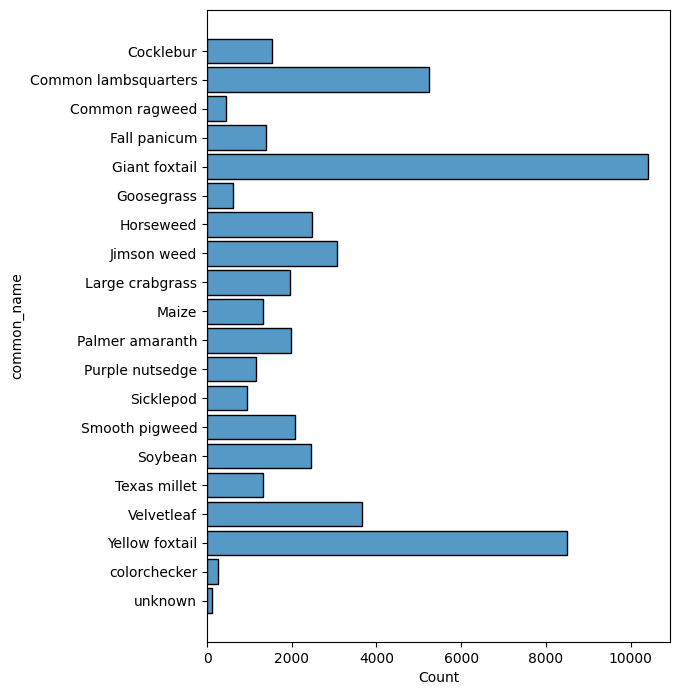

In [9]:
# scratch
import matplotlib.pyplot as plt
df = allcuts.copy()
copy_df = df.copy()
df = df[df["is_primary"] ==True]
copy_df = copy_df[copy_df["is_primary"] ==True]
copy_df["common_name"] = pd.Categorical(df["common_name"],
                                        sorted(df["common_name"].unique()))

fig, ax = plt.subplots(figsize=(12,8))
fig.tight_layout(pad=5)

ax = plt.subplot(1, 2, 1)
yplot = sns.histplot(y="common_name",
                        data=copy_df,
                        # hue="is_primary",
                        # multiple="dodge",
                        shrink=.85,
                        discrete=True,
                        palette=sns.diverging_palette(240, 16, s=92, n=2))
# yplot.bar_label(yplot.containers[0], padding=5)
# yplot.bar_label(yplot.containers[1], padding=5)

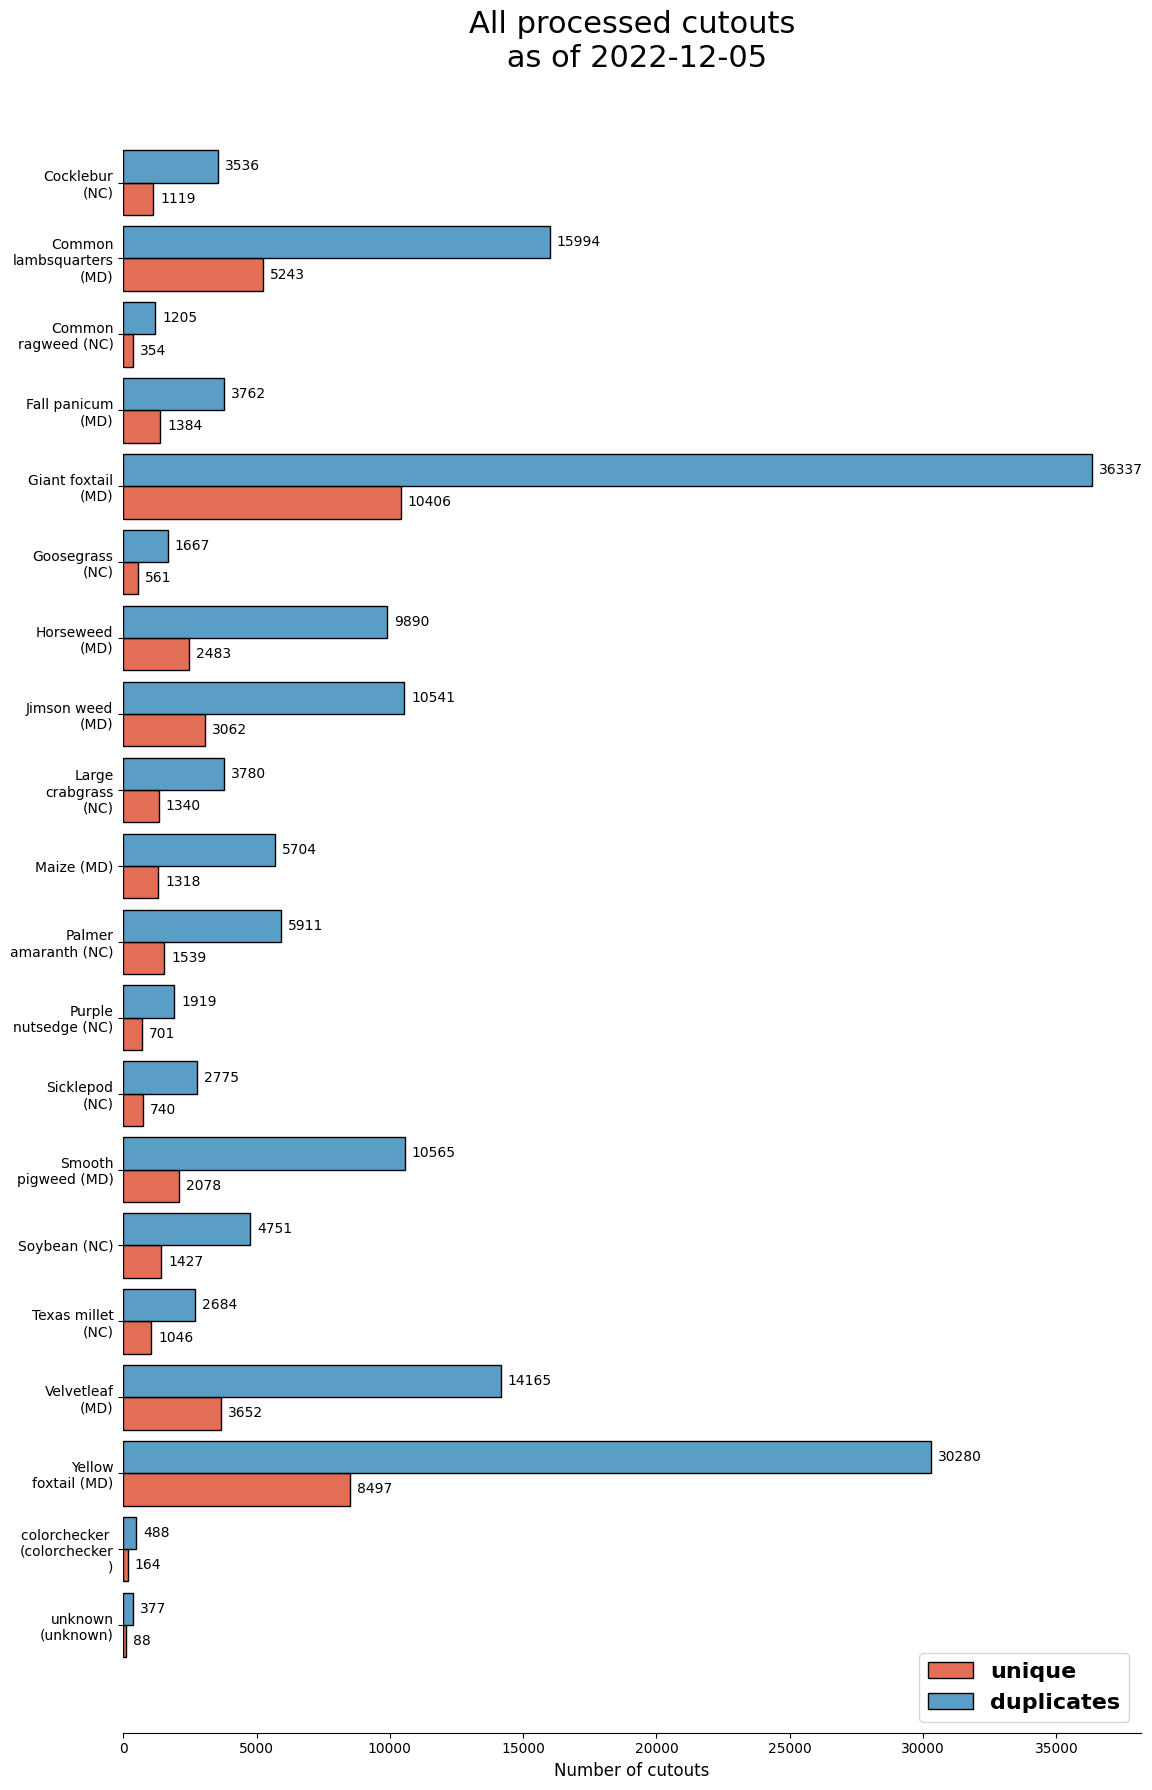

In [3]:
savedir="/home/mkutuga/Pipeline_v2/Pipeline"
allcuts_cname = allcuts.copy()
allcuts_cname["common_name"] = allcuts_cname["common_name"]  + " (" + allcuts_cname['collection_location'] + ")"
plot_cutouts(subplot=1,
             df=allcuts_cname,
             y='common_name',
             title=f"All processed cutouts\n as of {today}",
             figsize=(22, 18),
             color="viridis",
             xlabel="Number of cutouts",
             ylabel='',
             rotation=0,
             tick_bottom=True,
             tick_left=True,
             text_wrapping=13,
             save_path=f"{savedir}/ALL_cutout_figure.png",
             save=True,
             show=True)


In [10]:
len(allcuts.batch_id.unique())

30

### Summary Statistics

In [11]:
print("Number of Images: ", allcuts["image_id"].nunique())
print(
    "Sum Unique(primary) Cutouts: ",
    sum(allcuts[allcuts["is_primary"] == True].groupby(
        ["common_name"])["image_id"].value_counts()))
print("Total Number of Cutouts: ",
      sum(allcuts.groupby(["common_name"])["cutout_id"].value_counts()))
print()
print("Number of Unique Cutouts:\n",
      allcuts[allcuts["is_primary"] == True].common_name.value_counts())
allcuts.columns


Number of Images:  12224
Sum Unique(primary) Cutouts:  47202
Total Number of Cutouts:  213533

Number of Unique Cutouts:
 Giant foxtail           10406
Yellow foxtail           8497
Common lambsquarters     5243
Velvetleaf               3652
Jimson weed              3062
Horseweed                2483
Smooth pigweed           2078
Palmer amaranth          1539
Soybean                  1427
Fall panicum             1384
Large crabgrass          1340
Maize                    1318
Cocklebur                1119
Texas millet             1046
Sicklepod                 740
Purple nutsedge           701
Goosegrass                561
Common ragweed            354
colorchecker              164
unknown                    88
Name: common_name, dtype: int64


Index(['Unnamed: 0', 'blob_home', 'data_root', 'batch_id', 'image_id',
       'cutout_num', 'datetime', 'dap', 'cutout_id', 'cutout_path',
       ...
       'centroid1', 'eccentricity', 'extent', 'solidity', 'perimeter',
       'is_green', 'green_sum', 'exg_sum', 'blur_effect', 'num_components'],
      dtype='object', length=123)

In [12]:
sum_unique = sum(allcuts[allcuts["is_primary"] == True].groupby(
    ["common_name"])["image_id"].value_counts())
sum_all = sum(allcuts.groupby(["common_name"])["cutout_id"].value_counts())
costs = {
    "aws sagemaker": {
        "tiers": {
            "tier 1": {
                "units": 1,
                "bbox": 0.036,
                "semantic": 0.84
            }
        },
        "time": {}
    },
    "google cloud": {
        "tiers": {
            "tier 1": {
                "units": 1000,
                "bbox": 63,
                "semantic": 870
            },
            "tier 2": {
                "units": 1000,
                "bbox": 49,
                "semantic": 850
            }
        },
        "time": {}
    },
    "BWI Solutions": {
        "tiers": {
            "tier 1": {
                "units": 1,
                "bbox": 0.085,
                "semantic": 0.125
            },
        },
        "time": {
            "weeks": 2.5,
            "segments": 11000
        },
    }

    # "V7": {
    #     "tiers": {
    #         "tier 1": {
    #             "units": 1,
    #             "bbox": 1,
    #             "semantic": 1
    #         }
    #     }
    # }
}

for company in costs:
    tiers = costs[company]["tiers"]
    time = costs[company]["time"]
    for tier_num in costs[company]["tiers"]:
        pricing = tiers[tier_num]
        units = pricing.get("units")
        print(f"\n{company}")
        print(tier_num)
        print("Units per tier: ", units)
        print("Cost of labeling all bboxes ",
              pricing.get("bbox") * sum_all / units)
        print("Cost of labeling unique bboxes ",
              pricing.get("bbox") * sum_unique / units)
        print("Cost of labeling all segments ",
              pricing.get("semantic") * sum_all / units)
        print("Cost of labeling unique segments ",
              pricing.get("semantic") * sum_unique / units)
        print("time", time)
        if time.get("weeks"):
            print("Estimated time: ")
            print("All cutouts (weeks): ",  time.get("weeks") * sum_all / time.get("segments"))
            print("Unique cutouts (weeks): ",  time.get("weeks") * sum_unique / time.get("segments"))



aws sagemaker
tier 1
Units per tier:  1
Cost of labeling all bboxes  7687.187999999999
Cost of labeling unique bboxes  1699.272
Cost of labeling all segments  179367.72
Cost of labeling unique segments  39649.68
time {}

google cloud
tier 1
Units per tier:  1000
Cost of labeling all bboxes  13452.579
Cost of labeling unique bboxes  2973.726
Cost of labeling all segments  185773.71
Cost of labeling unique segments  41065.74
time {}

google cloud
tier 2
Units per tier:  1000
Cost of labeling all bboxes  10463.117
Cost of labeling unique bboxes  2312.898
Cost of labeling all segments  181503.05
Cost of labeling unique segments  40121.7
time {}

BWI Solutions
tier 1
Units per tier:  1
Cost of labeling all bboxes  18150.305
Cost of labeling unique bboxes  4012.17
Cost of labeling all segments  26691.625
Cost of labeling unique segments  5900.25
time {'weeks': 2.5, 'segments': 11000}
Estimated time: 
All cutouts (weeks):  48.530227272727274
Unique cutouts (weeks):  10.727727272727273


### Feature Stats

In [13]:
feat_col = [
    'batch_id', 'image_id', 'cutout_id', 'common_name', 'collection_location',
    'is_primary', 'extends_border', 'green_sum', 'area', 'area_bbox',
    'area_convex', 'axis_major_length', 'axis_minor_length', 'centroid0',
    'centroid1', 'eccentricity', 'extent', 'solidity', 'perimeter'
]


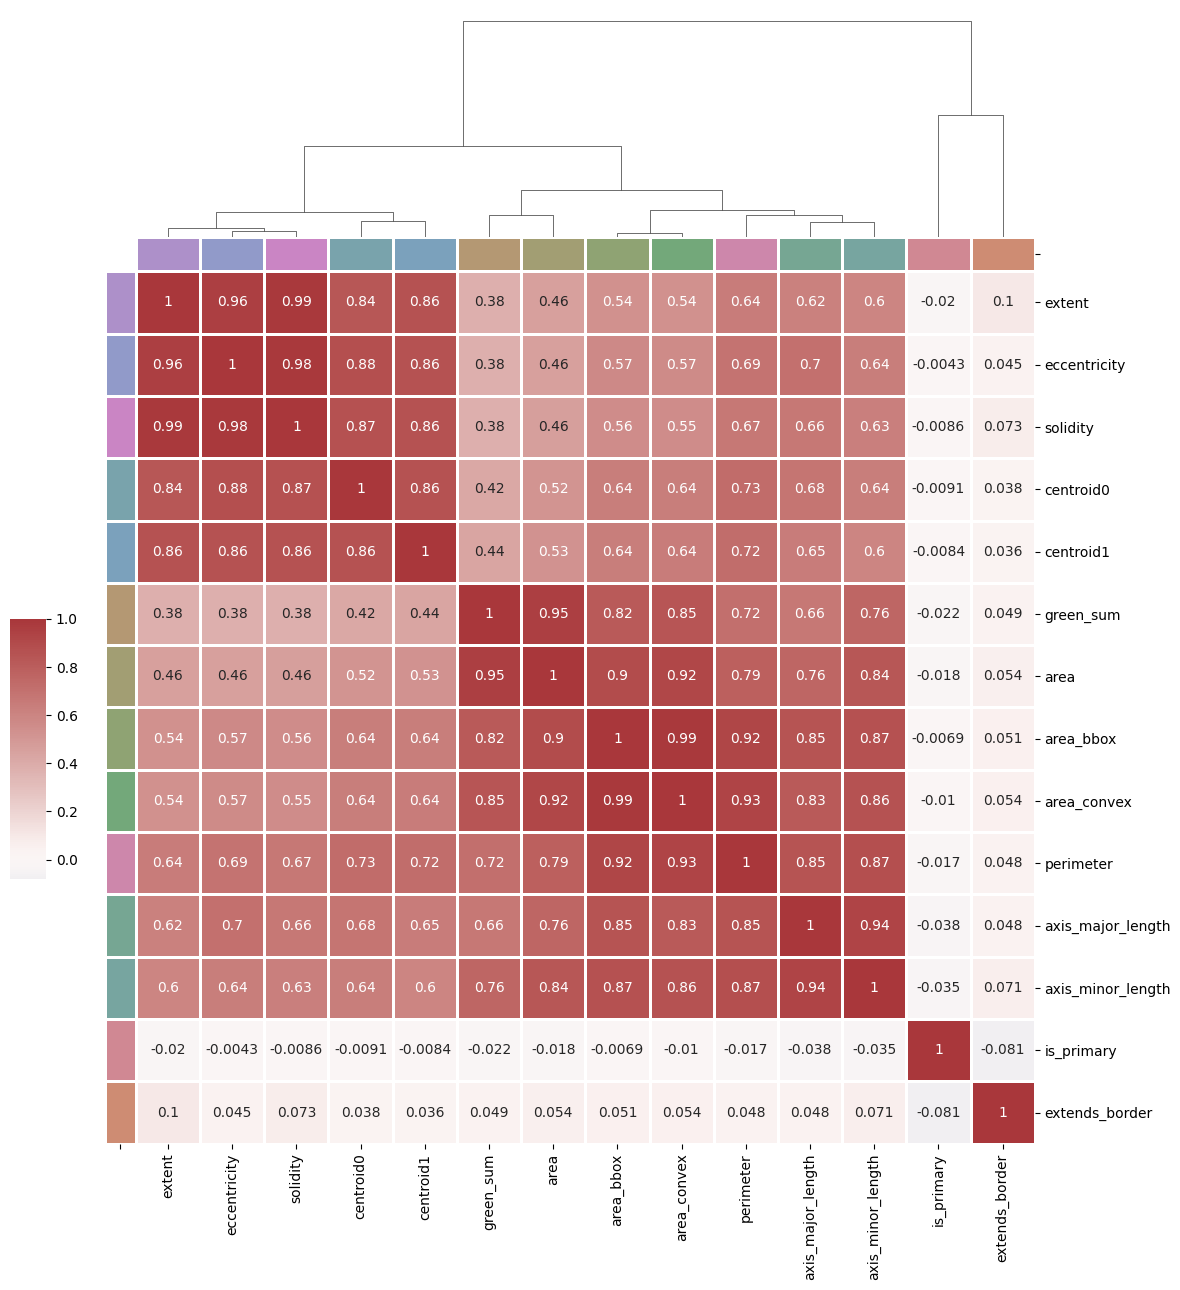

In [14]:
# https://seaborn.pydata.org/examples/structured_heatmap.html
used_features = [
    # 'batch_id', 'image_id','cutout_id',
    # 'common_name','collection_location',
    'is_primary',
    'extends_border',
    'green_sum',
    'area',
    'area_bbox',
    'area_convex',
    'axis_major_length',
    'axis_minor_length',
    'centroid0',
    'centroid1',
    'eccentricity',
    'extent',
    'solidity',
    'perimeter'
]

featdata = allcuts.loc[:, used_features]

# Create a categorical palette to identify the features
feat_pal = sns.husl_palette(len(used_features), s=.45)
feat_lut = dict(zip(map(str, used_features), feat_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
features = featdata.columns
feature_colors = pd.Series(features, index=featdata.columns).map(feat_lut)
# Draw the full plot
g = sns.clustermap(featdata.corr(),
                   center=0,
                   cmap="vlag",
                   annot=True,
                   row_colors=feature_colors,
                   col_colors=feature_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75,
                   figsize=(12, 13))
g.ax_row_dendrogram.remove()

In [22]:
allprim = allcuts[allcuts["is_primary"]==True]
named_featdata = allprim.loc[:, feat_col]
multfeatdf = named_featdata.groupby(["common_name"]).describe().reset_index()#names=["common_name"])
# print(multfeatdf)
savedir = "/home/weedsci/matt/SemiF-AnnotationPipeline/Assets"
# multfeatdf.to_csv(f"{savedir}/describe_all_cutouts.csv", index=False)
multfeatdf

common_name green_sum                                    \
                             count           mean           std  min   
0              Cocklebur    1119.0  523120.657730  1.067097e+06  5.0   
1   Common lambsquarters    5243.0   88878.584017  4.992955e+05  5.0   
2         Common ragweed     354.0  107458.330508  2.214201e+05  5.0   
3           Fall panicum    1384.0  151754.908237  4.787536e+05  5.0   
4          Giant foxtail   10406.0   38304.535364  3.897583e+05  5.0   
5             Goosegrass     561.0  133497.395722  3.119861e+05  5.0   
6              Horseweed    2483.0  110464.903343  5.550868e+05  5.0   
7            Jimson weed    3062.0  188310.366754  9.293966e+05  5.0   
8        Large crabgrass    1340.0  217081.630597  4.312543e+05  5.0   
9                  Maize    1318.0  333132.059181  8.684154e+05  5.0   
10       Palmer amaranth    1539.0  571094.772580  1.053073e+06  5.0   
11       Purple nutsedge     701.0   31146.221113  7.081756e+04  5.0   
12             Sicklepod     740.0  475206.466216  6.642278e+05  5.0   
13        Smooth pigweed    2078.0  223776.358037  1.131211e+06  5.0   
14               Soybean    1427.0  281729.696566  4.088362e+05  5.0   
15          Texas millet    1046.0  166667.417782  4.278040e+05  5.0   
16            Velvetleaf    3652.0  167905.543812  1.120252e+06  5.0   
17        Yellow foxtail    8497.0   31480.791927  3.318308e+05  5.0   
18          colorchecker     164.0    6527.256098  2.490074e+04  0.0   
19               unknown      88.0    3701.386364  5.990991e+03  5.0   

                                                  area  ...  solidity  \
         25%       50%        75%         max    count  ...       75%   
0     843.50   17161.0  406621.50   5940450.0   1119.0  ...  3.104986   
1      91.00     719.0    6224.50   9683253.0   5243.0  ...  3.377613   
2      84.00    9178.0  130316.00   1828074.0    354.0  ...  1.000000   
3     101.00     782.5   20583.25   3900417.0   1384.0  ...  3.446638   
4     174.00     698.5    2770.00  14497378.0  10406.0  ...  1.000000   
5     182.00   11145.0   78574.00   2007662.0    561.0  ...  1.000000   
6      94.00     841.0   12718.50   9008687.0   2483.0  ...  2.514919   
7     618.25    3484.0   13214.50  19978122.0   3062.0  ...  1.882511   
8     308.00    8176.5  183330.75   2395531.0   1340.0  ...  1.000000   
9    2854.50   29158.0  202328.75   8246630.0   1318.0  ...  1.513915   
10     66.00    6327.0  783260.50   7295810.0   1539.0  ...  2.692068   
11    112.00     927.0   18160.00    796027.0    701.0  ...  2.103502   
12  10538.00  150041.5  709798.00   3050903.0    740.0  ...  1.000000   
13     36.00     305.0    3160.25  15817282.0   2078.0  ...  3.653703   
14    859.00   91735.0  426563.00   2086977.0   1427.0  ...  1.000000   
15    276.00    1031.5   19375.25   2737873.0   1046.0  ...  1.000000   
16    289.00    2363.0   11234.50  20142203.0   3652.0  ...  1.903700   
17    139.00     549.0    1685.00  10809103.0   8497.0  ...  1.000000   
18      0.00       0.0       0.00    197112.0    164.0  ...  0.000000   
19    189.75    1387.5    3812.75     34284.0     88.0  ...  1.862466   

               perimeter                                                      \
           max     count          mean           std         min         25%   
0    42.054004    1119.0   7623.558464  12162.569677   60.000000  220.000000   
1    46.607795    5243.0   2459.968567   8768.705955   55.556349  226.000000   
2     7.134747     354.0   6711.979192  10318.670253   56.000000  208.852814   
3    49.550419    1384.0   9177.636942  26078.283845   68.000000  280.679978   
4    75.128869   10406.0   1859.366260   8581.222607   45.798990  249.105862   
5    12.100718     561.0   6901.462965  13367.634519   58.000000  219.746212   
6    40.952034    2483.0   3473.526675   9766.246524   76.000000  312.417785   
7    92.127503    3062.0   3928.032206  13400.463355   66.183766  476.646013   
8    19.396027    134

## Plot Cutout Description

In [23]:
from pprint import pprint
df = multfeatdf.copy()
df.columns = df.columns.to_flat_index()
df.columns = ['_'.join(x) for x in df.columns.get_level_values(0)]
pprint(df.columns[:20])
# df.head()

Index(['common_name_', 'green_sum_count', 'green_sum_mean', 'green_sum_std',
       'green_sum_min', 'green_sum_25%', 'green_sum_50%', 'green_sum_75%',
       'green_sum_max', 'area_count', 'area_mean', 'area_std', 'area_min',
       'area_25%', 'area_50%', 'area_75%', 'area_max', 'area_bbox_count',
       'area_bbox_mean', 'area_bbox_std'],
      dtype='object')


Total stats:  97
Number of used stats:  77


/tmp/ipykernel_2020105/2761792173.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.clustermap(featdata.corr(),


ValueError: The condensed distance matrix must contain only finite values.

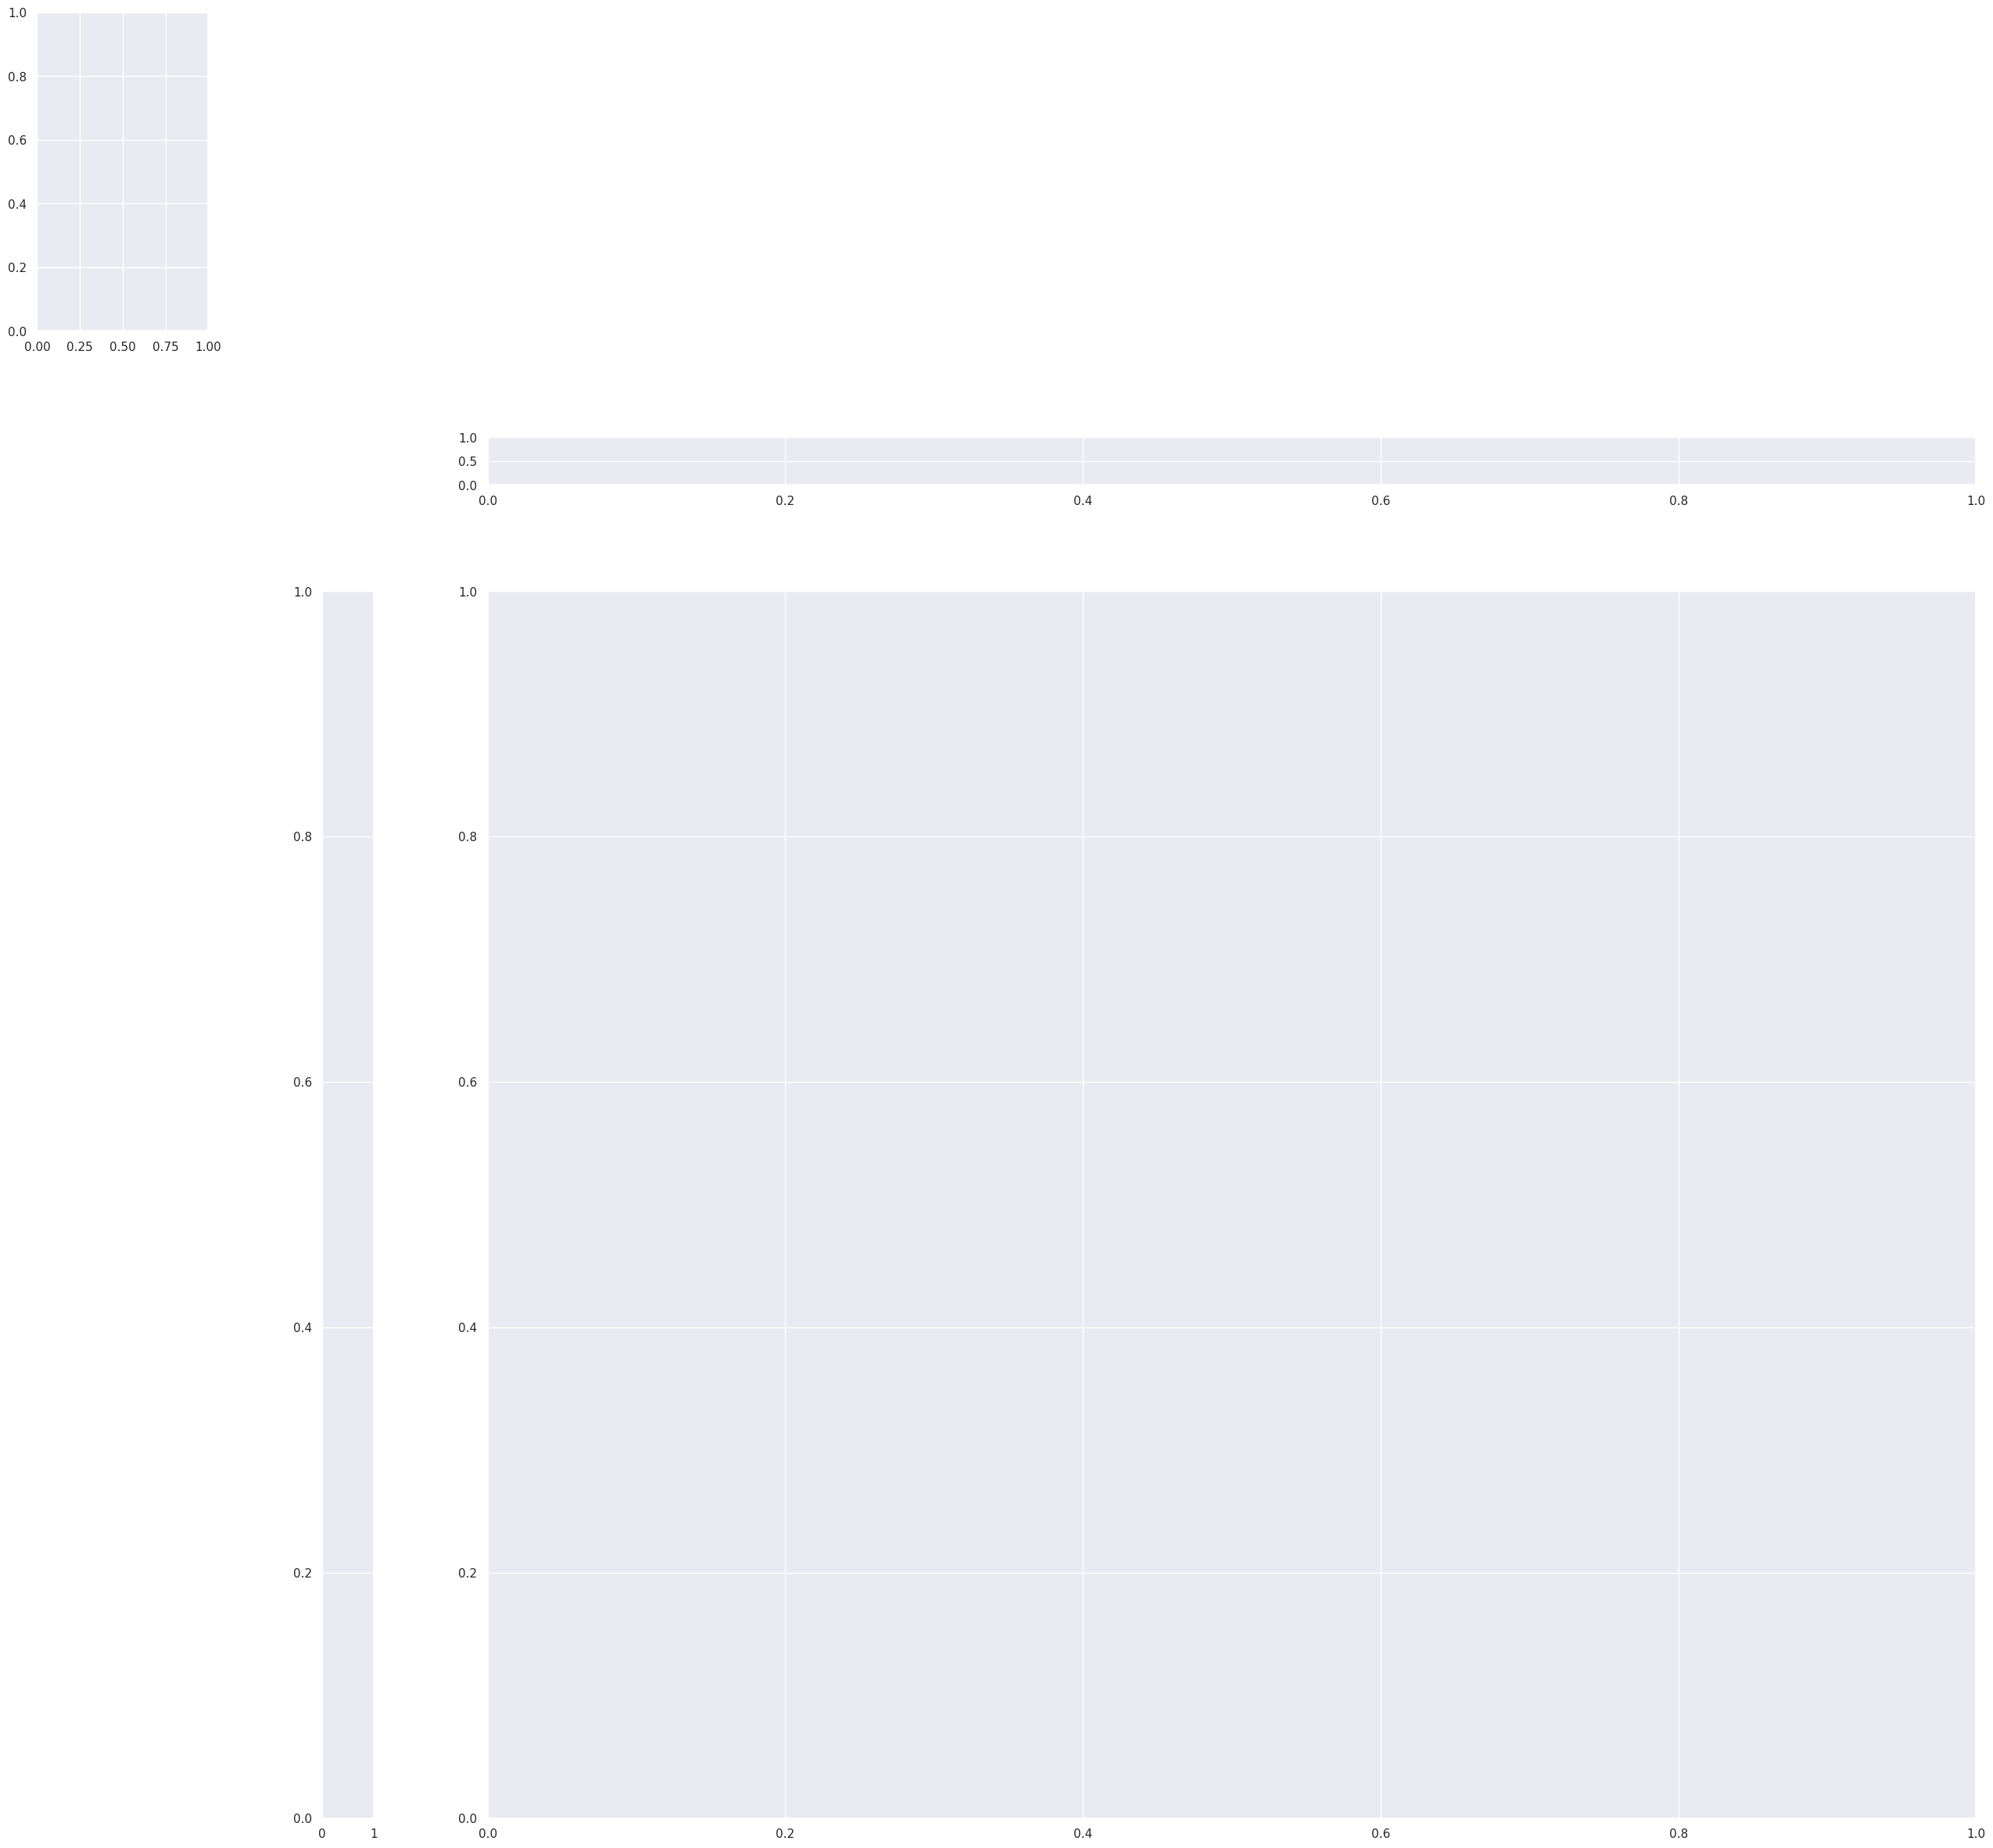

In [17]:
# https://seaborn.pydata.org/examples/structured_heatmap.html
print("Total stats: ",len(df.columns))
used_features = df.columns[:-20]
print("Number of used stats: ", len(used_features))
featdata = df.loc[:, used_features]

# Create a categorical palette to identify the features
feat_pal = sns.husl_palette(len(used_features), s=.45)
feat_lut = dict(zip(map(str, used_features), feat_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
features = featdata.columns
feature_colors = pd.Series(features, index=featdata.columns).map(feat_lut)
# Draw the full plot
sns.set(font_scale=1.)
g = sns.clustermap(featdata.corr(),
                   center=0,
                   cmap="vlag",
                   annot=False,
                   row_colors=feature_colors,
                   col_colors=feature_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75,
                   figsize=(32, 30))
g.ax_row_dendrogram.remove()

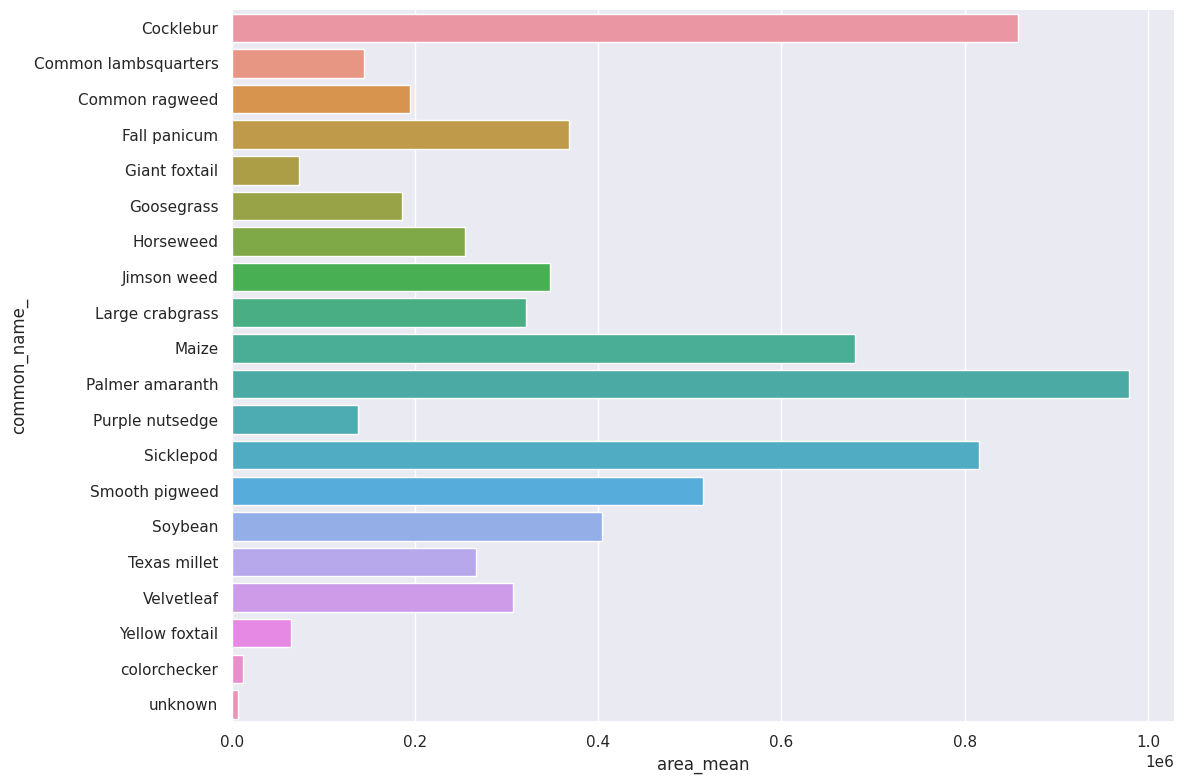

In [24]:
# data = pd.DataFrame(data={'val': values}, index=index).reset_index()
sns.catplot(
    data=df, x="area_mean", y="common_name_",height=8, aspect=1.5,
    kind="bar")

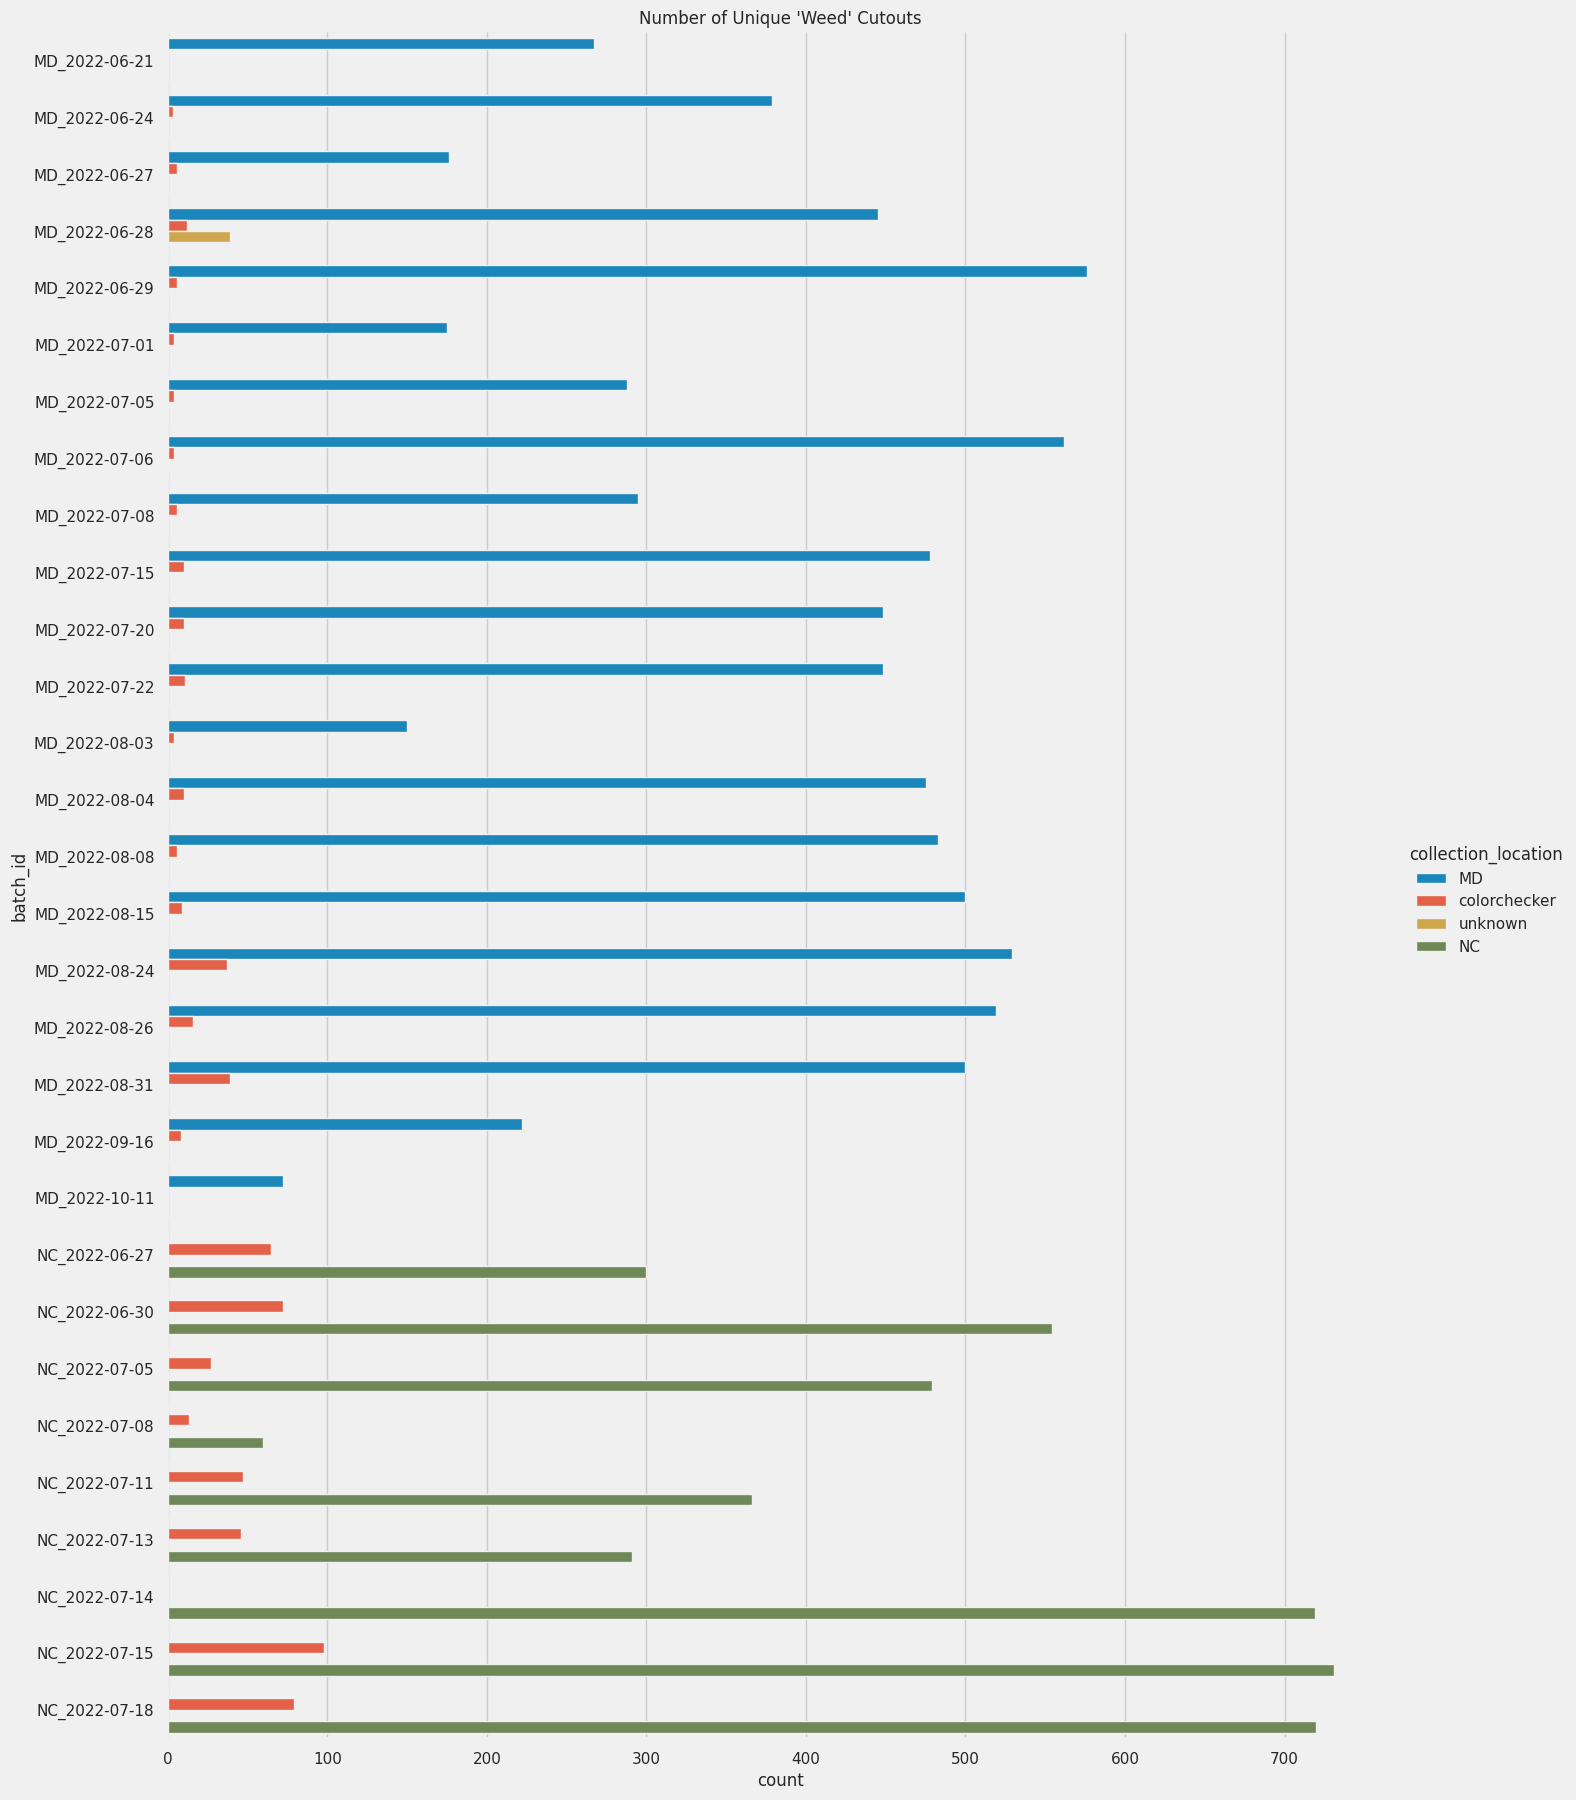

In [43]:

# sns.set_style("dark")
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
sns.set_context("notebook", rc={"font.size":14})
imgs = allcuts.groupby(["batch_id", "image_id","collection_location"]).nunique().reset_index()
df = imgs.copy()
df.columns = df.columns.to_flat_index()
df.head()
# imgs
df["collection_location"]
g = sns.catplot(
    data=df, y="batch_id",height=18, aspect=.8,hue="collection_location",
    kind="count")
g.set_titles("Number of unique cutouts")
plt.title("Number of Unique 'Weed' Cutouts")
sns.plotting_context()
plt.savefig("../../ALL_weeds_by_location.png")